# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress


# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")


Number of cities in the list: 590


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | edinburgh of the seven seas
Processing Record 2 of Set 1 | jabor
Processing Record 3 of Set 1 | ribeira grande
Processing Record 4 of Set 1 | vingt cinq
City not found. Skipping...
Processing Record 5 of Set 1 | shortandy
Processing Record 6 of Set 1 | port-aux-francais
Processing Record 7 of Set 1 | east london
Processing Record 8 of Set 1 | grytviken
Processing Record 9 of Set 1 | talnakh
Processing Record 10 of Set 1 | chunskiy
Processing Record 11 of Set 1 | puerto ayora
Processing Record 12 of Set 1 | blackmans bay
Processing Record 13 of Set 1 | lebu
Processing Record 14 of Set 1 | andergrove
Processing Record 15 of Set 1 | constantia
Processing Record 16 of Set 1 | stanley
Processing Record 17 of Set 1 | howrah
Processing Record 18 of Set 1 | tocopilla
Processing Record 19 of Set 1 | bethel
Processing Record 20 of Set 1 | enewetak
Processing Record 21 of Set 1 | wailua homesteads
Processin

In [4]:
city_data

[{'City': 'edinburgh of the seven seas',
  'Lat': -37.0676,
  'Lng': -12.3116,
  'Max Temp': 15.82,
  'Humidity': 68,
  'Cloudiness': 99,
  'Wind Speed': 9.38,
  'Country': 'SH',
  'Date': 1712194802},
 {'City': 'jabor',
  'Lat': 5.921,
  'Lng': 169.6434,
  'Max Temp': 27.95,
  'Humidity': 69,
  'Cloudiness': 76,
  'Wind Speed': 7.7,
  'Country': 'MH',
  'Date': 1712194802},
 {'City': 'ribeira grande',
  'Lat': 38.5167,
  'Lng': -28.7,
  'Max Temp': 15.43,
  'Humidity': 74,
  'Cloudiness': 18,
  'Wind Speed': 12.52,
  'Country': 'PT',
  'Date': 1712194802},
 {'City': 'shortandy',
  'Lat': 51.7006,
  'Lng': 70.9994,
  'Max Temp': 1.65,
  'Humidity': 76,
  'Cloudiness': 6,
  'Wind Speed': 2.97,
  'Country': 'KZ',
  'Date': 1712194803},
 {'City': 'port-aux-francais',
  'Lat': -49.35,
  'Lng': 70.2167,
  'Max Temp': 5.58,
  'Humidity': 65,
  'Cloudiness': 12,
  'Wind Speed': 9.87,
  'Country': 'TF',
  'Date': 1712194803},
 {'City': 'east london',
  'Lat': -33.0153,
  'Lng': 27.9116,
  'Max

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          562
Lat           562
Lng           562
Max Temp      562
Humidity      562
Cloudiness    562
Wind Speed    562
Country       562
Date          562
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,edinburgh of the seven seas,-37.0676,-12.3116,15.82,68,99,9.38,SH,1712194802
1,jabor,5.9210,169.6434,27.95,69,76,7.70,MH,1712194802
2,ribeira grande,38.5167,-28.7000,15.43,74,18,12.52,PT,1712194802
3,shortandy,51.7006,70.9994,1.65,76,6,2.97,KZ,1712194803
4,port-aux-francais,-49.3500,70.2167,5.58,65,12,9.87,TF,1712194803


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,edinburgh of the seven seas,-37.0676,-12.3116,15.82,68,99,9.38,SH,1712194802
1,jabor,5.9210,169.6434,27.95,69,76,7.70,MH,1712194802
2,ribeira grande,38.5167,-28.7000,15.43,74,18,12.52,PT,1712194802
3,shortandy,51.7006,70.9994,1.65,76,6,2.97,KZ,1712194803
4,port-aux-francais,-49.3500,70.2167,5.58,65,12,9.87,TF,1712194803


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

In [9]:

#Using the Time library, we transform the Unix timestamp to the date when the data was extracted.
unix_actualdate = city_data_df['Date'].iloc[0]
time_struct = time.localtime(unix_actualdate)

actualdate = time.strftime('%Y-%m-%d', time_struct)
actualdate

'2024-04-03'

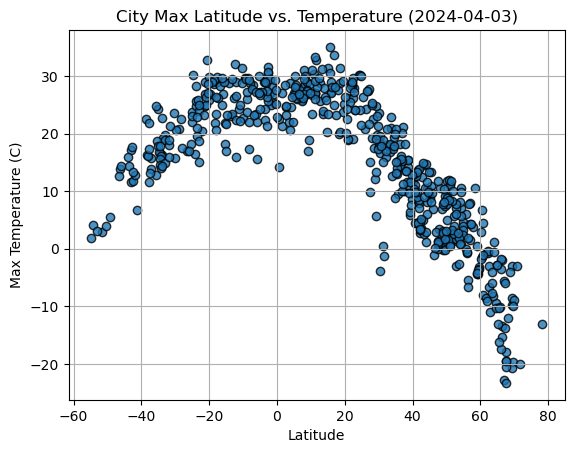

In [10]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], edgecolors='black', alpha=0.8)
# Incorporate the other graph properties

plt.xlabel('Latitude')

plt.ylabel('Max Temperature (C)')

plt.title(f'City Max Latitude vs. Temperature ({actualdate})')

plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig1.png")



# Show plot
plt.show()

#### Latitude Vs. Humidity

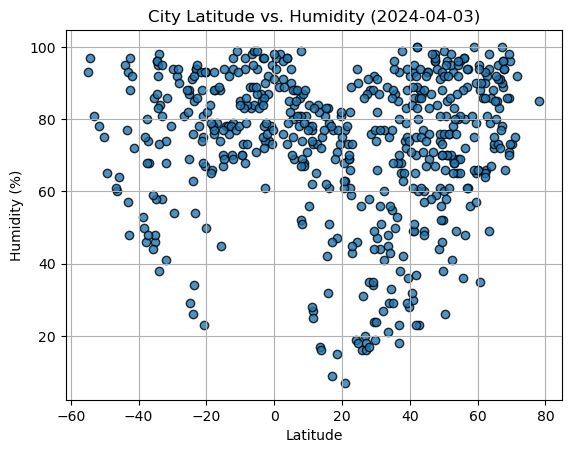

In [11]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], edgecolors='black', alpha=0.8)
# Incorporate the other graph properties

plt.xlabel('Latitude')

plt.ylabel('Humidity (%)')

plt.title(f'City Latitude vs. Humidity ({actualdate})')

plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

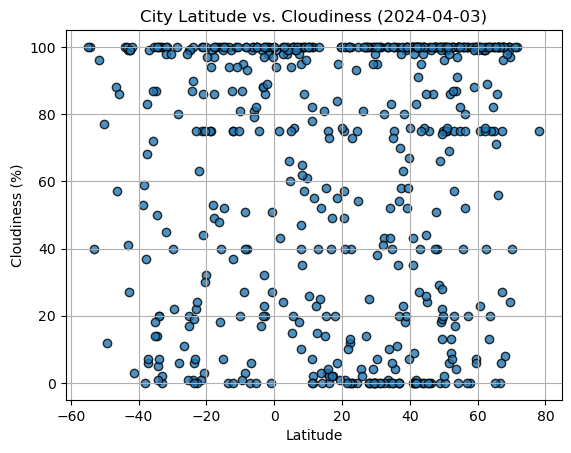

In [12]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], edgecolors='black', alpha=0.8)
# Incorporate the other graph properties

plt.xlabel('Latitude')

plt.ylabel('Cloudiness (%)')

plt.title(f'City Latitude vs. Cloudiness ({actualdate})')

plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

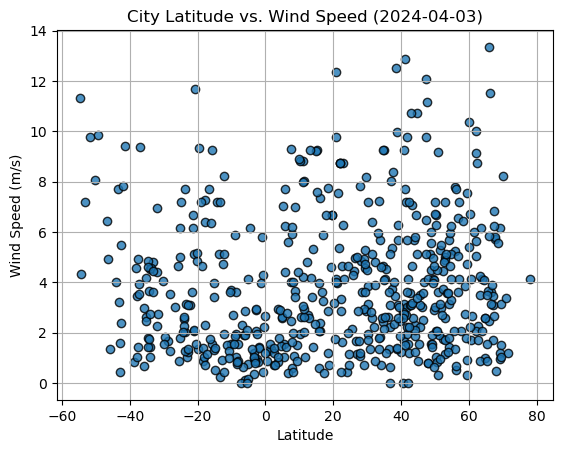

In [13]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], edgecolors='black', alpha=0.8)
# Incorporate the other graph properties

plt.xlabel('Latitude')

plt.ylabel('Wind Speed (m/s)')

plt.title(f'City Latitude vs. Wind Speed ({actualdate})')

plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [14]:
# Define a function to create Linear Regression plots
def linear_regress_fun(x,y):
    slope, intercept, r_value, p_value, std_err = linregress(x,y)

    print(f'The r-value is: {r_value}')
    plt.plot(x, slope*x + intercept, color='red')
    
    equation = f'y = {slope:.2f}x + {intercept:.2f}'
    x_range = max(x) - min(x)
    y_range = max(y) - min(y)
    x_pos = min(x) + 0.3 * x_range  
    y_pos = min(y) + 0.2 * y_range
    plt.annotate(equation,(x_pos, y_pos), fontsize = 15, color ='red')
    
    
    
    

In [15]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]
north_sort_df = northern_hemi_df.sort_values('Max Temp')
# Display sample data
northern_hemi_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,jabor,5.9210,169.6434,27.95,69,76,7.70,MH,1712194802
2,ribeira grande,38.5167,-28.7000,15.43,74,18,12.52,PT,1712194802
3,shortandy,51.7006,70.9994,1.65,76,6,2.97,KZ,1712194803
7,talnakh,69.4865,88.3972,-19.71,96,97,1.52,RU,1712194804
8,chunskiy,56.0815,99.6342,-0.74,97,100,5.23,RU,1712194804


In [16]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,edinburgh of the seven seas,-37.0676,-12.3116,15.82,68,99,9.38,SH,1712194802
4,port-aux-francais,-49.3500,70.2167,5.58,65,12,9.87,TF,1712194803
5,east london,-33.0153,27.9116,19.69,81,100,4.79,ZA,1712194803
6,grytviken,-54.2811,-36.5092,4.09,97,100,4.34,GS,1712194804
9,puerto ayora,-0.7393,-90.3518,25.31,95,27,0.45,EC,1712194804


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.9052432373545637


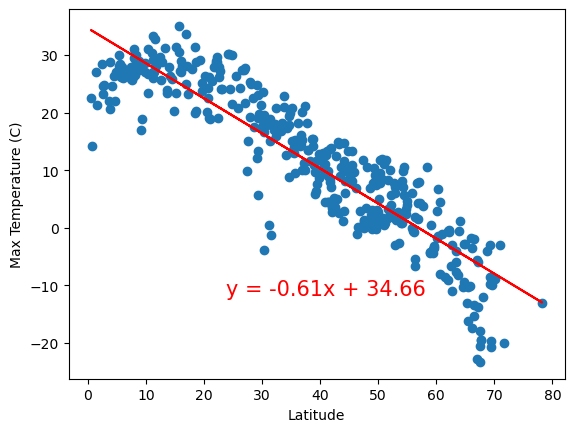

In [17]:
# Linear regression on Northern Hemisphere
linear_regress_fun(north_sort_df['Lat'], north_sort_df['Max Temp'])

plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'])
plt.xlabel('Latitude')

plt.ylabel('Max Temperature (C)')

plt.savefig("output_data/Fig5.png")
plt.show()


The r-value is: 0.7791469830039217


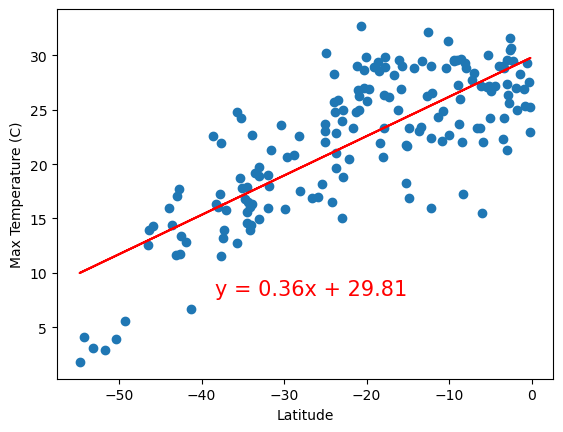

In [18]:
# Linear regression on Southern Hemisphere
linear_regress_fun(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'])

plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'])
plt.xlabel('Latitude')

plt.ylabel('Max Temperature (C)')

plt.savefig("output_data/Fig6.png")
plt.show()

**Discussion about the linear relationship:** 
**Temperature vs. Latitude:**

- A very strong negative correlation (close to -0.8 R-value) exists between temperature and latitude in both hemispheres. 
This aligns with our expectations, as regions closer to the equator (0 latitude) receive more direct sunlight throughout the year, 
leading to warmer temperatures.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.1698624176950581


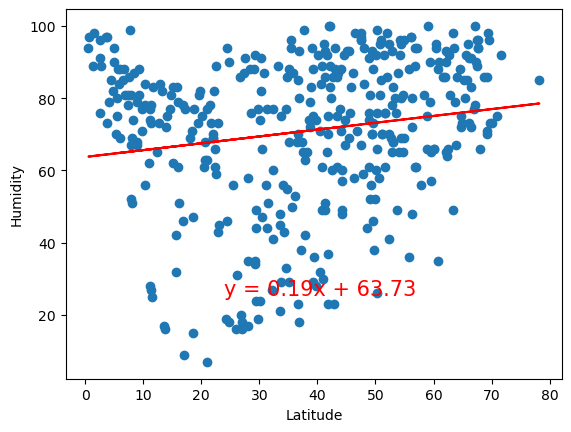

In [19]:
# Northern Hemisphere
linear_regress_fun(northern_hemi_df['Lat'], northern_hemi_df['Humidity'])

plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Humidity'])
plt.xlabel('Latitude')

plt.ylabel('Humidity')

plt.savefig("output_data/Fig7.png")
plt.show()

The r-value is: 0.23836542144082706


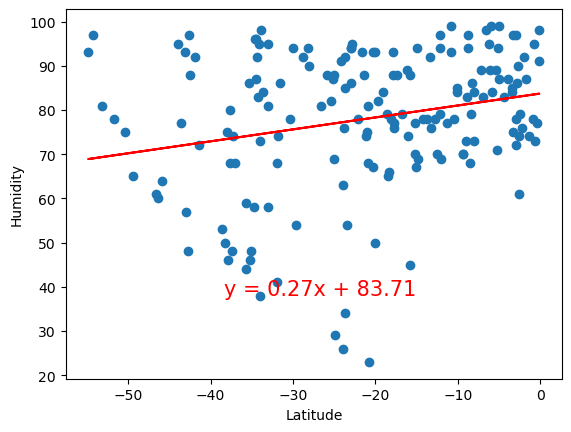

In [20]:
# Southern Hemisphere
linear_regress_fun(southern_hemi_df['Lat'], southern_hemi_df['Humidity'])

plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Humidity'])
plt.xlabel('Latitude')

plt.ylabel('Humidity')

plt.savefig("output_data/Fig8.png")
plt.show()

**Discussion about the linear relationship:** 

**Humidity vs. Latitude:**
- A weak positive correlation is observed between humidity and latitude. Areas near the equator tend to be slightly more humid, possibly due to the higher concentration of cities in these regions compared to the polar extremes (-70 and 70 latitudes). However, this correlation might be influenced by the varying number of cities included in the analysis across different latitudes.


### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.1427606194028591


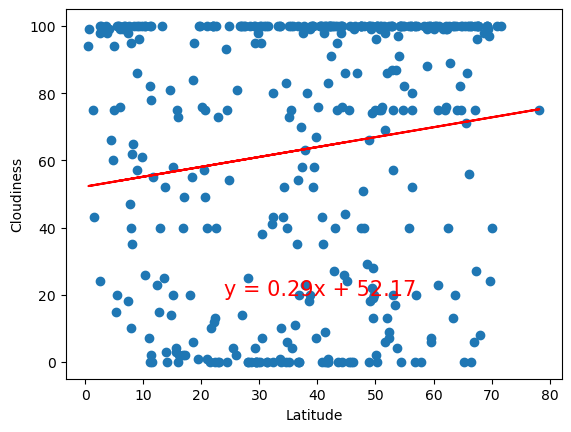

In [21]:
# Northern Hemisphere
linear_regress_fun(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'])

plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'])
plt.xlabel('Latitude')

plt.ylabel('Cloudiness')

plt.savefig("output_data/Fig9.png")
plt.show()

The r-value is: 0.09270654095182623


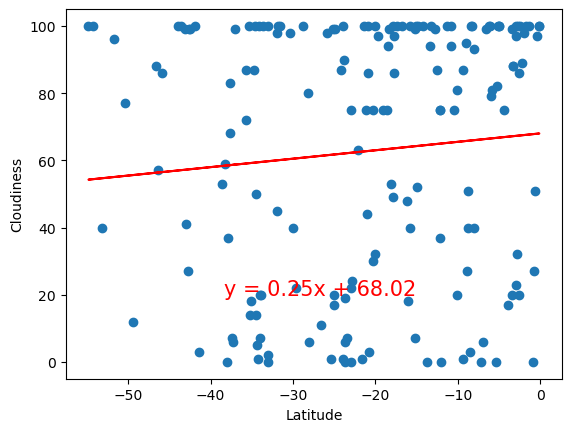

In [22]:
# Southern Hemisphere
linear_regress_fun(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'])

plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'])
plt.xlabel('Latitude')

plt.ylabel('Cloudiness')

plt.savefig("output_data/Fig10.png")
plt.show()

**Discussion about the linear relationship:** 

**Cloudiness vs. Latitude:**
- Linear regression analysis suggests minimal to no relationship between cloudiness and latitude (low R-value). Cloud cover is likely influenced by factors beyond latitude, and the visualizations indicate that cloudiness can be either 0% or 100% across the entire latitude range.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.055898467242817794


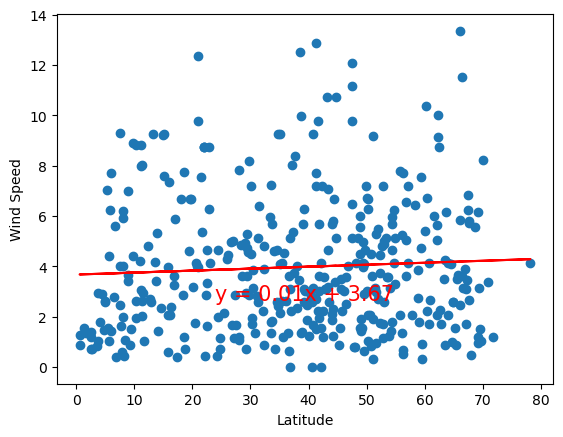

In [23]:
# Northern Hemisphere
linear_regress_fun(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'])

plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'])
plt.xlabel('Latitude')

plt.ylabel('Wind Speed')

plt.savefig("output_data/Fig11.png")
plt.show()

The r-value is: -0.38200922780334234


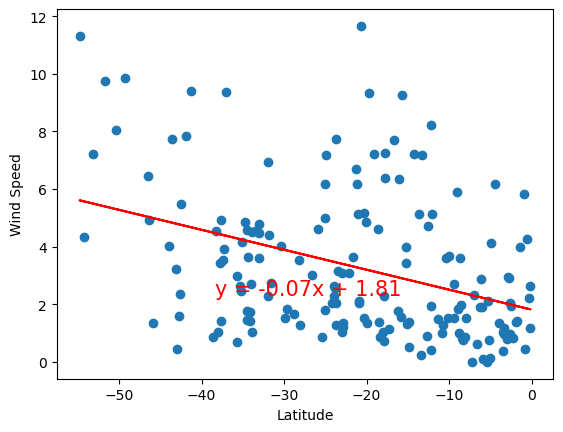

In [24]:
# Southern Hemisphere
linear_regress_fun(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'])

plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'])
plt.xlabel('Latitude')

plt.ylabel('Wind Speed')

plt.savefig("output_data/Fig12.png")
plt.show()

**Discussion about the linear relationship:** 

**Wind Speed vs. Latitude:**
- The analysis shows the weakest correlation between wind speed and latitude. Wind patterns are primarily determined by geographical features rather than latitude. The graphs reveal that wind speeds typically remain below 6 m/s across most latitudes.